In [14]:
from rescure import initial_random_matrix
from rescure import get_rates_phenol
from rescure import choose_event
import numpy as np

In [15]:
ratio = (1, 2, 1)

inital_state = initial_random_matrix(15, ratio)

print(inital_state)

[[1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1.]
 [0. 0. 1. 0. 2. 0. 0. 1. 2. 1. 1. 2. 1. 1. 1.]
 [1. 2. 0. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 0. 1.]
 [2. 1. 1. 0. 0. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2.]
 [0. 1. 1. 1. 1. 2. 2. 1. 2. 2. 0. 0. 1. 1. 1.]
 [0. 2. 2. 0. 1. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 2. 0. 1. 2. 2. 0. 2. 1. 2.]
 [1. 1. 1. 1. 2. 0. 0. 1. 0. 2. 1. 1. 0. 2. 1.]
 [0. 0. 0. 0. 1. 2. 1. 2. 0. 1. 1. 1. 1. 1. 1.]
 [2. 2. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 2.]
 [1. 2. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [2. 0. 1. 0. 1. 0. 1. 1. 1. 1. 2. 2. 1. 0. 0.]
 [0. 1. 2. 2. 2. 1. 1. 0. 1. 1. 1. 0. 1. 2. 1.]
 [1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 2. 1. 0. 1. 1.]
 [2. 2. 0. 1. 1. 2. 0. 0. 2. 1. 0. 1. 1. 1. 1.]]


In [16]:
n_phenol = np.count_nonzero(inital_state == 1)
n_coal = np.count_nonzero(inital_state == 2)
n_void = np.count_nonzero(inital_state == 0)

print(n_phenol, n_coal, n_void)

125 51 49


In [17]:
# Test to see if the distrubution is the correct ratio:

n = len(inital_state)

voids = []
phenols = []
coals = []

for i in range(n):
    for j in range(n):
        if inital_state[i][j] == 0:
            voids.append((i, j))
        elif inital_state[i][j] == 1:
            phenols.append((i, j))
        elif inital_state[i][j] == 2:
            coals.append((i, j))

print(len(voids))
print(len(phenols))
print(len(coals))

# Looks like it's working!

49
125
51


Let's test the kernel / filter:

In [18]:
start_mol = (5, 4)
i, j = start_mol

periphery = []

for k in range(i-1, j+2):
    for l in range(j-1, j+2):
        periphery.append(inital_state[k, l]) #NOT WORKING

# Reshape the periphery array to be a 3x3 array:

# periphery = np.array(periphery).reshape(3, 3)
print(periphery)

[1.0, 1.0, 2.0, 0.0, 1.0, 0.0]


In [19]:
# Different method of setting up the kernel / mask:

start_mol = (5, 4)
i, j = start_mol

kernel = np.zeros((3, 3))

kernel[0, 0] = 1 # Still need to figure out how to do this automatically

Testing a simple rate function calculator:

In [20]:
state = inital_state

pos_1 = (3, 6)
pos_2 = (8, 12)
pos_3 = (13, 2)

T = 1

rates_1 = get_rates_phenol(state, pos_1, T)
rates_2 = get_rates_phenol(state, pos_2, T)
rates_3 = get_rates_phenol(state, pos_3, T)

print(rates_1)
print("\n")
print(rates_2)
print("\n")
print(rates_3)

(3.8, 0.11999999999999994, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [(2, 5), (2, 6), (2, 7), (3, 5), (3, 7), (4, 5), (4, 6), (4, 7)], [1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0])


(4.5600000000000005, 0.03999999999999998, 0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [(7, 11), (7, 12), (7, 13), (8, 11), (8, 13), (9, 11), (9, 12), (9, 13)], [1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0])


(2.2800000000000002, 0.15999999999999992, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, [(12, 1), (12, 2), (12, 3), (13, 1), (13, 3), (14, 1), (14, 2), (14, 3)], [1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 1.0])


In [21]:
event1 = choose_event(rates_1[0:11], 1)
event2 = choose_event(rates_2[0:11], 2)
event3 = choose_event(rates_3[0:11], 1)

print(event1)
print(event2)
print(event3)

pp_rxn
pc_rxn
pp_rxn


# Let's test the simulation:

In [22]:
import rescure

In [34]:
n = 20
ratio = (30, 3, 1) # (voids, phenols, coals)
T = 353.5 # Kelvin
n_iter = 50

state_list, temps, crosslinks, coal_rxn, heat_rxn, init_mols, final_mols = rescure.resin_cure_simulation(n, ratio, T, n_iter)

print(temps)
print("Temps length: ", len(temps))
print(crosslinks)
print("Crosslinks length: ", len(crosslinks))
print(coal_rxn)
print(heat_rxn)
print("\n")
print(init_mols)
print(final_mols)


[353.5, 353.50591, 353.50737, 353.50766999999996, 353.50766999999996, 353.50766999999996, 353.50809999999996, 353.50867999999997, 353.50867999999997, 353.50953999999996, 353.50953999999996, 353.51039999999995, 353.51039999999995, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997, 353.51054999999997]
Temps leng

Success! For now.

In [30]:
state_1 = state_list[0]
state_2 = state_list[-1]

print(state_1)
print("\n")
print(state_2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 2. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0.]
 [0. 1. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0.

Can we turn this into a heatmap?

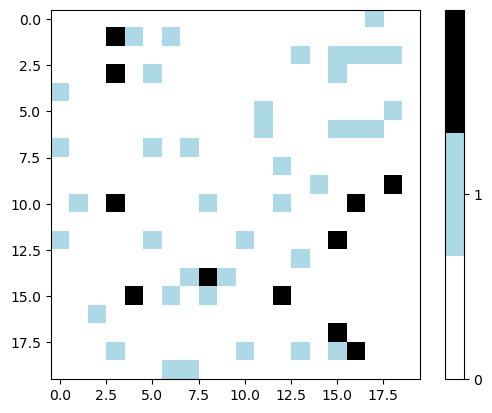

In [33]:
import numpy as np
# Take the states and turn them into heat maps so
# we can visualize them better:

import matplotlib.pyplot as plt
# Define the custom colormap
cmap = plt.cm.colors.ListedColormap(['white', 'lightblue', 'black'])

# Plot the heat map using the custom colormap
plt.imshow(state_1, cmap=cmap, interpolation='nearest')

# Add colorbar
plt.colorbar(ticks=np.arange(2))

# Show the plot
plt.show()


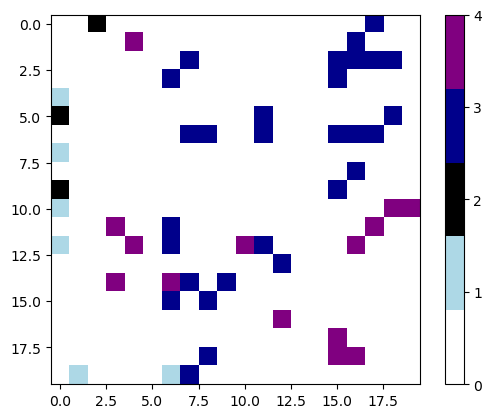

In [32]:
cmap = plt.cm.colors.ListedColormap(['white', 'lightblue', 'black', 'darkblue', 'purple'])

plt.imshow(state_2, cmap=cmap, interpolation='nearest')
plt.colorbar(ticks=np.arange(5))
plt.show()